# Custom Layers in Keras

# Task 1: Importing Libraries

In [7]:
import tensorflow as tf
#import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.2.0


In [2]:
#utils

def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = np.reshape(x_train, (x_train.shape[0], 784))/255.
    x_test = np.reshape(x_test, (x_test.shape[0], 784))/255.
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    return (x_train, y_train), (x_test, y_test)

def plot_random_examples(x, y, p=None):
    indices = np.random.choice(range(0, x.shape[0]), 10)
    y = np.argmax(y, axis=1)
    if p is None:
        p = y
    plt.figure(figsize=(10, 5))
    for i, index in enumerate(indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[index].reshape((28, 28)), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if y[index] == p[index]:
            col = 'g'
        else:
            col = 'r'
        plt.xlabel(str(p[index]), color=col)
    return plt

def plot_results(history):
    history = history.history
    plt.figure(figsize=(12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['loss'], label='Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_accuracy'], label='Val Acc')
    plt.plot(range(epochs), history['accuracy'], label='Acc')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt

# Task 2: Import and Visualize Dataset

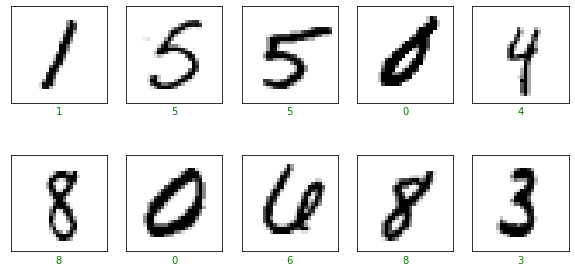

In [8]:
(x_train, y_train), (x_test, y_test) = load_data()

plot_random_examples(x_train, y_train).show()

# Task 3: Creating a Custom Layer

In [9]:
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name='minimum', 
            shape=(1,),
            initializer='zeros',
            trainable=True
        )
        super(ParametricRelu, self).build(input_shape)
    
    def call(self, x):
        return tf.maximum(0., x) + self.alpha * tf.minimum(0., x)

# Task 4: Creating the Model

In [10]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(784,)))
    if not use_prelu:
        model.add(tf.keras.layers.ReLU())
    else:
        model.add(ParametricRelu())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
parametric_relu (ParametricR (None, 64)                1         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


# Task 5: Model Training

In [11]:
print('Initial alpha:', model.layers[1].get_weights())

h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

print('Final alpha:', model.layers[1].get_weights())

Initial alpha: [array([0.], dtype=float32)]
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2977 - accuracy: 0.9165 - val_loss: 0.1573 - val_accuracy: 0.9526
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1279 - accuracy: 0.9619 - val_loss: 0.1089 - val_accuracy: 0.9673
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9739 - val_loss: 0.0904 - val_accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0702 - accuracy: 0.9779 - val_loss: 0.0972 - val_accuracy: 0.9702
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0895 - val_accuracy: 0.9723
Final alpha: [array([-0.9769962], dtype=float32)]


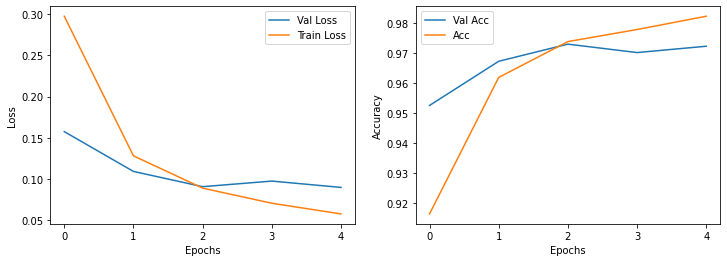

In [12]:
plot_results(h).show()

# Task 6: Comparison with ReLU

In [13]:
model = create_model(use_prelu=False)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3003 - accuracy: 0.9150 - val_loss: 0.1768 - val_accuracy: 0.9464
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1469 - accuracy: 0.9575 - val_loss: 0.1196 - val_accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1071 - accuracy: 0.9685 - val_loss: 0.0993 - val_accuracy: 0.9695
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0835 - accuracy: 0.9755 - val_loss: 0.0928 - val_accuracy: 0.9694
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0676 - accuracy: 0.9799 - val_loss: 0.0869 - val_accuracy: 0.9737


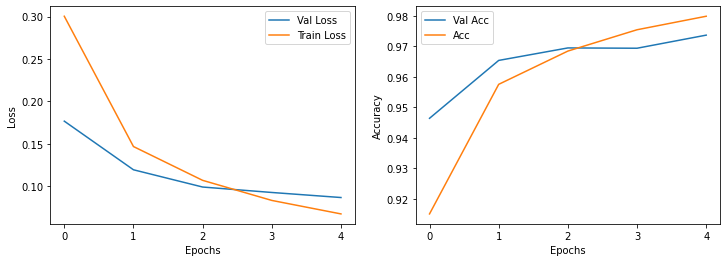

In [15]:
plot_results(h).show()